In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('../results/concepts_features.csv', engine='python')
data.head()

,ConceptA,ConceptB,ChapterDist,PageDist,LineDist,WordDist,Total,LineCount,WordCount,Complexity
0,amazon cloudfront,amazon cloudwatch,0,248,0,0,40,0,0,-6
1,amazon cloudfront,amazon devpay,0,64,0,0,8,4,0,2
2,amazon cloudfront,amazon elastic block store (ebs),0,-48,0,0,8,0,0,2
3,amazon cloudfront,amazon machine images (amis),0,48,0,0,8,0,0,2
4,amazon cloudfront,iaas model,80,2432,0,0,16,0,0,0


In [3]:
concepts = data.copy()[['ConceptA','ConceptB']]
concepts.loc[:,'prereq'] = 0
concepts.loc[(concepts['ConceptA'] == 'abstraction') & (concepts['ConceptB'] == 'cloud computing'),'prereq'] = 1
concepts.loc[(concepts['ConceptA'] == 'virtualization') & (concepts['ConceptB'] == 'cloud computing'),'prereq'] = 1
concepts.loc[(concepts['ConceptA'] == 'infrastructure') & (concepts['ConceptB'] == 'deployment model'),'prereq'] = 1
concepts.loc[(concepts['ConceptA'] == 'service') & (concepts['ConceptB'] == 'service models'),'prereq'] = 1
print("Total:\t\t", concepts.shape[0])
print("Current:\t", sum(concepts['prereq']))

Total:		 1670556
Current:	 4


In [37]:
# concept_feats = pd.read_csv('../results/concepts.csv', engine='python')
# concept_feats[concept_feats['Page'] == ]['Concept']

0               amazon cloudfront
7                   amazon devpay
93       amazon elastic mapreduce
135        amazon mechanical turk
342                        access
                   ...           
39549                web services
39550                web services
40083                   framework
40377                       alexa
40378                       alexa
Name: Concept, Length: 150, dtype: object

In [ ]:
# https://stackoverflow.com/questions/21816346/fine-tuning-parameters-in-logistic-regression
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [ ]:
# Ref : https://arxiv.org/pdf/1106.1813.pdf
# SMOTE Technique for Class Balancing

X = concepts.loc[:, concepts.columns != 'prereq']
y = concepts.loc[:, concepts.columns == 'prereq']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [ ]:
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# REF algorithm + P-Values of features

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
# Evaluation on F1-Score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# Analysis of ROC Curves

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

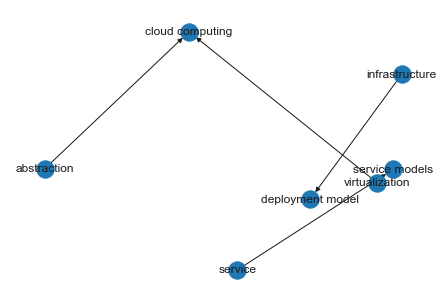

<Figure size 14400x10800 with 0 Axes>

In [4]:
import networkx as nx
G = nx.DiGraph()

# # add the nodes
# nodes = list(concepts['ConceptA'].unique())
# #print(nodes)
# G.add_nodes_from(nodes[:300])


# add the edges
concepts_list = []
ConceptA = concepts[concepts['prereq']==1]['ConceptA']
ConceptB = concepts[concepts['prereq']==1]['ConceptB']
prereqs = []
for conceptA, conceptB in zip(ConceptA, ConceptB):
    prereqs.append((conceptA, conceptB))
    concepts_list.append(conceptA)
    concepts_list.append(conceptB)
concepts_list = list(set(concepts_list))

G.add_nodes_from(concepts_list)
G.add_edges_from(prereqs)

%matplotlib inline
import matplotlib.pyplot as plt
nx.draw_random(G,  with_labels = True)
plt.figure(figsize=(200,150))
plt.show()
